In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

df = pd.read_csv("../data/Students Social Media Addiction.csv")

In [2]:
df_clean = df.dropna(subset=["Country", "Most_Used_Platform", "Avg_Daily_Usage_Hours"])

In [3]:
avg_usage = df_clean.groupby(["Country", "Most_Used_Platform"])["Avg_Daily_Usage_Hours"].mean().reset_index()
avg_usage

,Country,Most_Used_Platform,Avg_Daily_Usage_Hours
0,Afghanistan,LinkedIn,2.9
1,Albania,TikTok,4.7
2,Andorra,TikTok,5.3
3,Argentina,TikTok,5.5
4,Armenia,Instagram,5.9
...,...,...,...
166,Uzbekistan,TikTok,5.5
167,Vatican City,YouTube,4.4
168,Venezuela,Facebook,3.3
169,Vietnam,Facebook,3.6


In [4]:
avg_usage_sorted = avg_usage.sort_values(by="Avg_Daily_Usage_Hours", ascending=False)
#avg_usage_sorted = avg_usage_sorted.drop_duplicates(subset="Country", keep="first")
avg_usage_sorted

,Country,Most_Used_Platform,Avg_Daily_Usage_Hours
162,USA,TikTok,7.206250
161,USA,Instagram,7.015789
59,India,TikTok,6.820000
126,Russia,Instagram,6.787500
61,India,WhatsApp,6.776000
...,...,...,...
134,South Africa,LinkedIn,2.300000
88,Malaysia,LinkedIn,2.200000
60,India,Twitter,2.100000
143,Sweden,LinkedIn,2.000000


In [5]:
top5 = avg_usage_sorted.head(5)
#top5_fix = top5.drop_duplicates(subset="Country", keep="first")
bottom5 = avg_usage_sorted.tail(5)
#bottom5_fix = bottom5.drop_duplicates(subset="Country", keep="first")

selected_countries = pd.concat([top5, bottom5])
#selected_countries = top_bottom.drop_duplicates(subset="Country", keep="first")
selected_countries

,Country,Most_Used_Platform,Avg_Daily_Usage_Hours
162,USA,TikTok,7.206250
161,USA,Instagram,7.015789
59,India,TikTok,6.820000
126,Russia,Instagram,6.787500
61,India,WhatsApp,6.776000
134,South Africa,LinkedIn,2.300000
88,Malaysia,LinkedIn,2.200000
60,India,Twitter,2.100000
143,Sweden,LinkedIn,2.000000
51,Germany,LinkedIn,1.500000


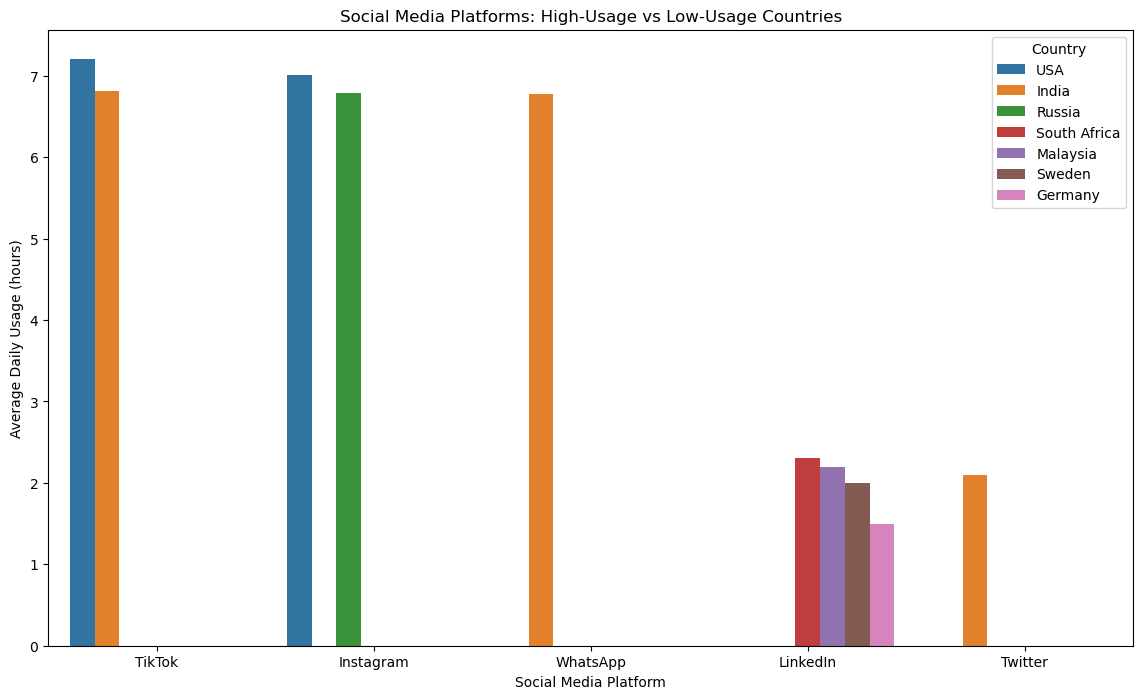

In [6]:
plt.figure(figsize=(14,8))
sns.barplot(
    x="Most_Used_Platform",
    #x="Country",
    y="Avg_Daily_Usage_Hours",
    hue="Country",
    #hue="Most_Used_Platform",
    data=selected_countries
)

plt.title("Social Media Platforms: High-Usage vs Low-Usage Countries")
plt.xlabel("Social Media Platform")
plt.ylabel("Average Daily Usage (hours)")
plt.show()